<a href="https://colab.research.google.com/github/Jeevana023/codesoft-technologies/blob/main/Copy_of_Untitled60.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded successfully.

--- Dataset Head ---
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.14

/tmp/ipython-input-3943839395.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='viridis')


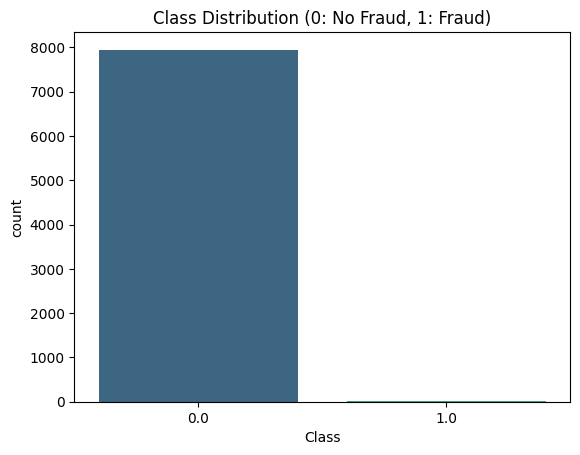


--- Features after scaling and dropping 'Time' ---
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24     

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


Original training data shape: (6377, 29)
Resampled training data shape: (12714, 29)
Resampled training class distribution:
Class
0.0    6357
1.0    6357
Name: count, dtype: int64

--- Logistic Regression (without SMOTE) ---

Classification Report (Logistic Regression - No SMOTE):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1590
         1.0       1.00      0.80      0.89         5

    accuracy                           1.00      1595
   macro avg       1.00      0.90      0.94      1595
weighted avg       1.00      1.00      1.00      1595

ROC AUC Score (Logistic Regression - No SMOTE): 1.0000


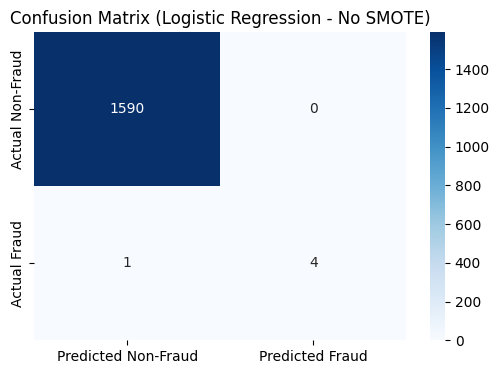


--- Logistic Regression (with SMOTE) ---

Classification Report (Logistic Regression - With SMOTE):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1590
         1.0       0.83      1.00      0.91         5

    accuracy                           1.00      1595
   macro avg       0.92      1.00      0.95      1595
weighted avg       1.00      1.00      1.00      1595

ROC AUC Score (Logistic Regression - With SMOTE): 0.9999


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


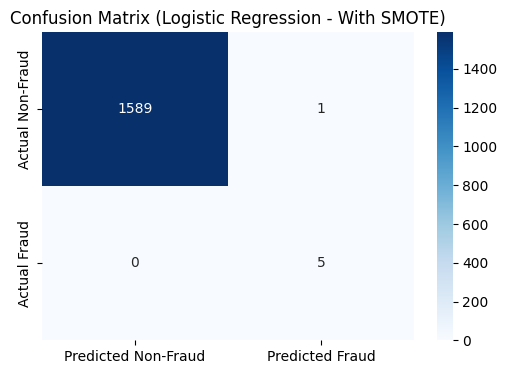


--- Random Forest Classifier (with SMOTE) ---

Classification Report (Random Forest - With SMOTE):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1590
         1.0       1.00      0.80      0.89         5

    accuracy                           1.00      1595
   macro avg       1.00      0.90      0.94      1595
weighted avg       1.00      1.00      1.00      1595

ROC AUC Score (Random Forest - With SMOTE): 1.0000


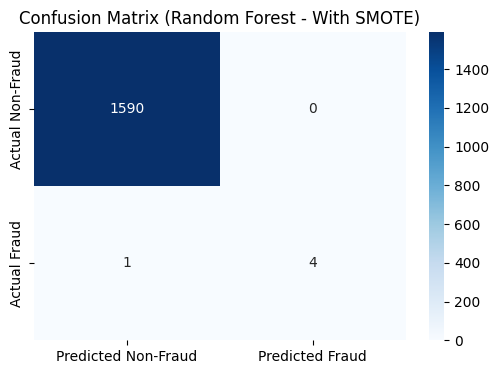


--- Precision-Recall Curves ---


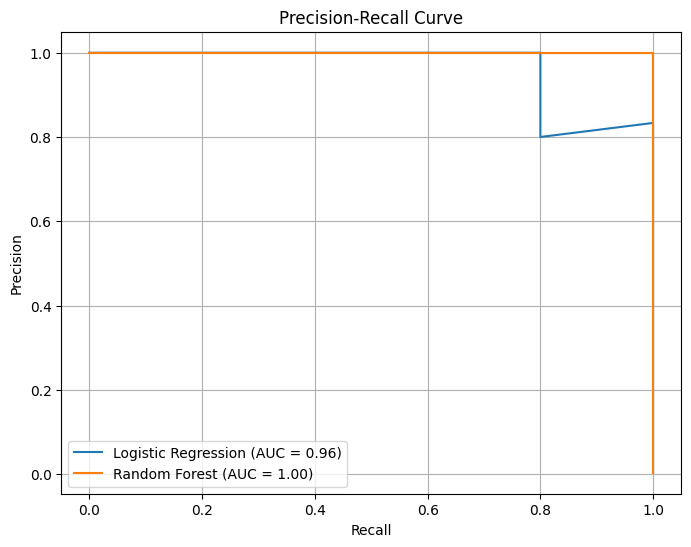


Precision-Recall AUC (Logistic Regression - With SMOTE): 0.9633
Precision-Recall AUC (Random Forest - With SMOTE): 1.0000


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling Technique

# --- 1. Load the Dataset ---
try:
    df = pd.read_csv('creditcard.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'creditcard.csv' not found. Please download it from Kaggle "
          "(https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) and place it "
          "in the same directory as your script.")
    # exit() # Removed exit() to allow the rest of the code to be evaluated

# --- 2. Initial Data Exploration ---
print("\n--- Dataset Head ---")
# Check if df is defined before using it
if 'df' in locals():
    print(df.head())
else:
    print("DataFrame 'df' not created due to file loading error.")


print("\n--- Dataset Info ---")
# Check if df is defined before using it
if 'df' in locals():
    df.info()
else:
    print("DataFrame 'df' not created due to file loading error.")


print("\n--- Class Distribution (Original) ---")
# Check if df is defined before using it
if 'df' in locals() and not df.empty:
    class_counts = df['Class'].value_counts()
    print(class_counts)
    # Check if class 1.0 exists in class_counts before accessing its count
    fraud_percentage = round(class_counts.get(1.0, 0.0) / len(df) * 100, 2)
    print(f"Fraudulent transactions: {fraud_percentage}% of total")

    # Visualize the class imbalance
    sns.countplot(x='Class', data=df, palette='viridis')
    plt.title('Class Distribution (0: No Fraud, 1: Fraud)')
    plt.show()
else:
    print("DataFrame 'df' not created or is empty due to file loading error. Cannot display class distribution.")


# --- 3. Preprocessing ---
# Check if df is defined and not empty before preprocessing
if 'df' in locals() and not df.empty:
    # Drop rows with NaN in 'Class' column
    df.dropna(subset=['Class'], inplace=True)

    # Drop 'Time' column as it's not directly useful for fraud detection (time elapsed between first transaction)
    # and 'Amount' needs scaling. 'V' features are already scaled by PCA.
    X = df.drop('Class', axis=1)
    y = df['Class']

    # Scale 'Amount'
    scaler = StandardScaler()
    X['Amount'] = scaler.fit_transform(X['Amount'].values.reshape(-1, 1))
    X = X.drop('Time', axis=1) # Drop Time after scaling Amount

    print("\n--- Features after scaling and dropping 'Time' ---")
    print(X.head())

    # --- 4. Split Data ---
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    # stratify=y ensures that both training and testing sets have a similar proportion of fraud cases

    print(f"\nTrain set shape: {X_train.shape}, {y_train.shape}")
    print(f"Test set shape: {X_test.shape}, {y_test.shape}")
    print(f"Train set fraud ratio: {y_train.value_counts(normalize=True)[1]:.4f}")
    # Check if class 1.0 exists in y_test before accessing its count
    test_fraud_ratio = y_test.value_counts(normalize=True).get(1.0, 0.0)
    print(f"Test set fraud ratio: {test_fraud_ratio:.4f}")

    # --- 5. Handle Imbalanced Data (SMOTE) ---
    # Apply SMOTE only to the training data to avoid data leakage
    print("\n--- Applying SMOTE to training data ---")
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    print(f"Original training data shape: {X_train.shape}")
    print(f"Resampled training data shape: {X_train_resampled.shape}")
    print(f"Resampled training class distribution:\n{y_train_resampled.value_counts()}")

    # --- 6. Model Training and Evaluation ---

    # Model 1: Logistic Regression (without SMOTE for comparison)
    print("\n--- Logistic Regression (without SMOTE) ---")
    lr_model = LogisticRegression(solver='liblinear', random_state=42, n_jobs=-1)
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)
    y_prob_lr = lr_model.predict_proba(X_test)[:, 1] # Probability of being class 1 (fraud)

    print("\nClassification Report (Logistic Regression - No SMOTE):")
    print(classification_report(y_test, y_pred_lr))
    print(f"ROC AUC Score (Logistic Regression - No SMOTE): {roc_auc_score(y_test, y_prob_lr):.4f}")

    cm_lr = confusion_matrix(y_test, y_pred_lr)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
                yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
    plt.title('Confusion Matrix (Logistic Regression - No SMOTE)')
    plt.show()

    # Model 2: Logistic Regression (with SMOTE)
    print("\n--- Logistic Regression (with SMOTE) ---")
    lr_smote_model = LogisticRegression(solver='liblinear', random_state=42, n_jobs=-1)
    lr_smote_model.fit(X_train_resampled, y_train_resampled)
    y_pred_lr_smote = lr_smote_model.predict(X_test)
    y_prob_lr_smote = lr_smote_model.predict_proba(X_test)[:, 1]

    print("\nClassification Report (Logistic Regression - With SMOTE):")
    print(classification_report(y_test, y_pred_lr_smote))
    print(f"ROC AUC Score (Logistic Regression - With SMOTE): {roc_auc_score(y_test, y_prob_lr_smote):.4f}")

    cm_lr_smote = confusion_matrix(y_test, y_pred_lr_smote)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_lr_smote, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
                yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
    plt.title('Confusion Matrix (Logistic Regression - With SMOTE)')
    plt.show()

    # Model 3: Random Forest Classifier (with SMOTE)
    print("\n--- Random Forest Classifier (with SMOTE) ---")
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')
    # class_weight='balanced' can also help with imbalance, even after SMOTE
    rf_model.fit(X_train_resampled, y_train_resampled)
    y_pred_rf = rf_model.predict(X_test)
    y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

    print("\nClassification Report (Random Forest - With SMOTE):")
    print(classification_report(y_test, y_pred_rf))
    print(f"ROC AUC Score (Random Forest - With SMOTE): {roc_auc_score(y_test, y_prob_rf):.4f}")

    cm_rf = confusion_matrix(y_test, y_pred_rf)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
                yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
    plt.title('Confusion Matrix (Random Forest - With SMOTE)')
    plt.show()

    # --- 7. Precision-Recall Curve (Important for Imbalanced Data) ---
    # ROC AUC is often misleading for highly imbalanced datasets. Precision-Recall (PR) curve is better.
    print("\n--- Precision-Recall Curves ---")

    precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_prob_lr_smote)
    pr_auc_lr = auc(recall_lr, precision_lr)

    precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)
    pr_auc_rf = auc(recall_rf, precision_rf)

    plt.figure(figsize=(8, 6))
    plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (AUC = {pr_auc_lr:.2f})')
    plt.plot(recall_rf, precision_rf, label=f'Random Forest (AUC = {pr_auc_rf:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"\nPrecision-Recall AUC (Logistic Regression - With SMOTE): {pr_auc_lr:.4f}")
    print(f"Precision-Recall AUC (Random Forest - With SMOTE): {pr_auc_rf:.4f}")
else:
    print("\nPreprocessing and subsequent steps skipped due to file loading error.")